In [1]:
# Load the important packages
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Load the datasets
cancer = load_breast_cancer()
X = cancer.data[:, :2]  # Using first 2 features for visualization
y = cancer.target

# Split the data for proper evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build and train the model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

print("Setup complete! Now run the individual plots below...")

Setup complete! Now run the individual plots below...


<Figure size 800x600 with 0 Axes>

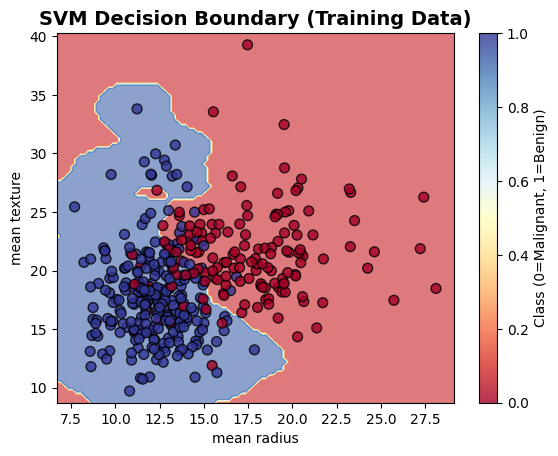

In [2]:
plt.figure(figsize=(8, 6))
DecisionBoundaryDisplay.from_estimator(
    svm,
    X_train,
    response_method="predict",
    cmap=plt.cm.RdYlBu,
    alpha=0.6,
    xlabel=cancer.feature_names[0],
    ylabel=cancer.feature_names[1],
)
scatter = plt.scatter(X_train[:, 0], X_train[:, 1],
                     c=y_train,
                     s=50,
                     edgecolors="black",
                     cmap=plt.cm.RdYlBu,
                     alpha=0.8)
plt.title("SVM Decision Boundary (Training Data)", fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Class (0=Malignant, 1=Benign)')
plt.show()

/tmp/ipython-input-3-3330781242.py:23: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[~correct_mask, 0], X_test[~correct_mask, 1],


<Figure size 800x600 with 0 Axes>

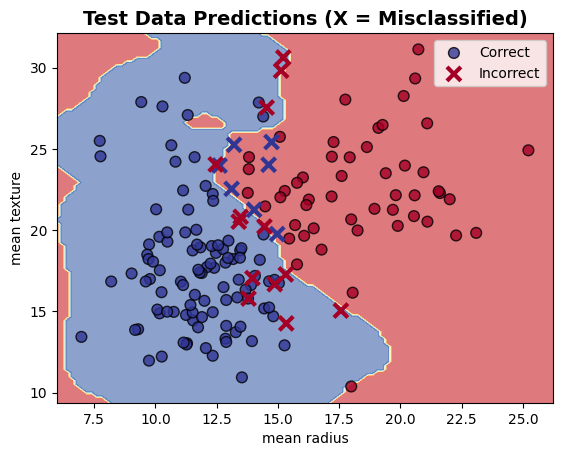

In [3]:
plt.figure(figsize=(8, 6))
DecisionBoundaryDisplay.from_estimator(
    svm,
    X_test,
    response_method="predict",
    cmap=plt.cm.RdYlBu,
    alpha=0.6,
    xlabel=cancer.feature_names[0],
    ylabel=cancer.feature_names[1],
)
# Correct predictions
correct_mask = y_test == y_pred
plt.scatter(X_test[correct_mask, 0], X_test[correct_mask, 1],
           c=y_test[correct_mask],
           s=60,
           marker='o',
           edgecolors="black",
           cmap=plt.cm.RdYlBu,
           alpha=0.8,
           label='Correct')
# Incorrect predictions
if np.any(~correct_mask):
    plt.scatter(X_test[~correct_mask, 0], X_test[~correct_mask, 1],
               c=y_test[~correct_mask],
               s=100,
               marker='x',
               edgecolors="red",
               linewidths=3,
               cmap=plt.cm.RdYlBu,
               label='Incorrect')
    plt.legend()
plt.title("Test Data Predictions (X = Misclassified)", fontsize=14, fontweight='bold')
plt.show()

<Figure size 800x600 with 0 Axes>

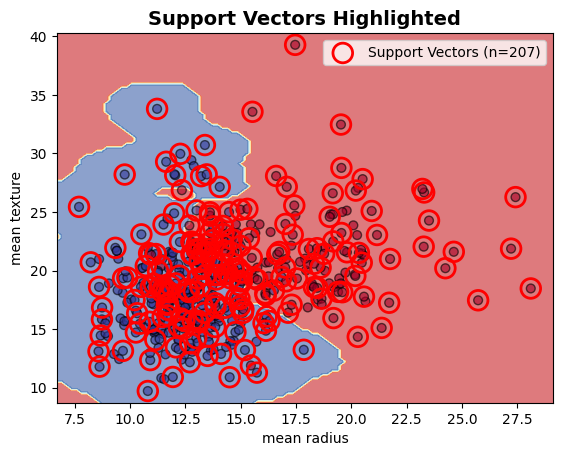

In [4]:
plt.figure(figsize=(8, 6))
DecisionBoundaryDisplay.from_estimator(
    svm,
    X_train,
    response_method="predict",
    cmap=plt.cm.RdYlBu,
    alpha=0.6,
    xlabel=cancer.feature_names[0],
    ylabel=cancer.feature_names[1],
)
# Plot all training points
plt.scatter(X_train[:, 0], X_train[:, 1],
           c=y_train,
           s=40,
           edgecolors="black",
           cmap=plt.cm.RdYlBu,
           alpha=0.6)
# Highlight support vectors
support_vectors = svm.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
           s=200,
           facecolors='none',
           edgecolors='red',
           linewidths=2,
           label=f'Support Vectors (n={len(support_vectors)})')
plt.title("Support Vectors Highlighted", fontsize=14, fontweight='bold')
plt.legend()
plt.show()

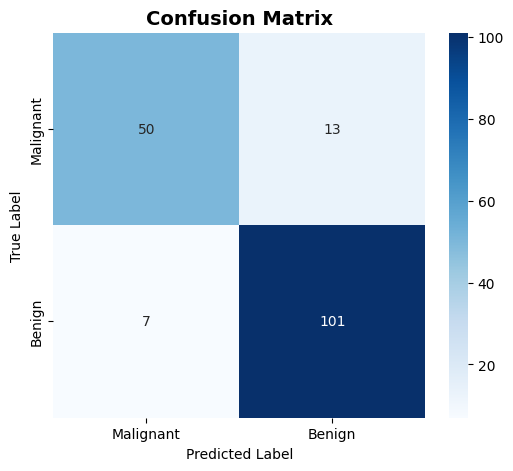

In [5]:
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.title("Confusion Matrix", fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


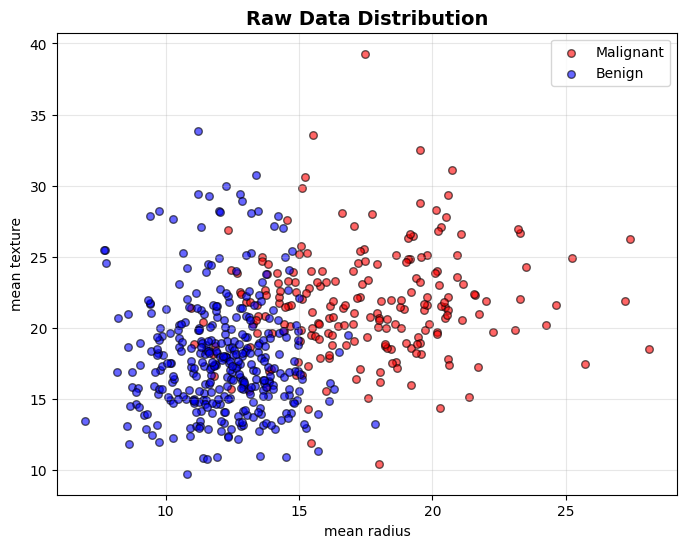

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y==0, 0], X[y==0, 1],
           c='red', alpha=0.6, s=30, label='Malignant', edgecolors='black')
plt.scatter(X[y==1, 0], X[y==1, 1],
           c='blue', alpha=0.6, s=30, label='Benign', edgecolors='black')
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.title("Raw Data Distribution", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

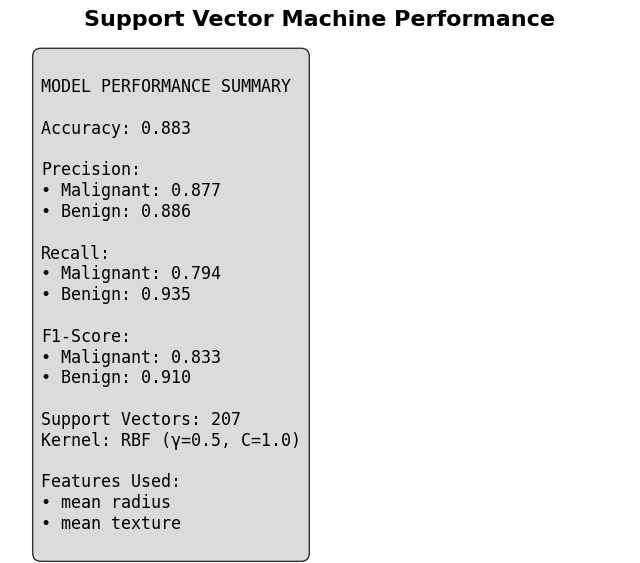

In [7]:
plt.figure(figsize=(8, 6))
plt.axis('off')
accuracy = (y_test == y_pred).mean()
report = classification_report(y_test, y_pred, target_names=['Malignant', 'Benign'], output_dict=True)

metrics_text = f"""
MODEL PERFORMANCE SUMMARY

Accuracy: {accuracy:.3f}

Precision:
• Malignant: {report['Malignant']['precision']:.3f}
• Benign: {report['Benign']['precision']:.3f}

Recall:
• Malignant: {report['Malignant']['recall']:.3f}
• Benign: {report['Benign']['recall']:.3f}

F1-Score:
• Malignant: {report['Malignant']['f1-score']:.3f}
• Benign: {report['Benign']['f1-score']:.3f}

Support Vectors: {len(svm.support_vectors_)}
Kernel: RBF (γ=0.5, C=1.0)

Features Used:
• {cancer.feature_names[0]}
• {cancer.feature_names[1]}
"""

plt.text(0.05, 0.95, metrics_text, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))
plt.title("Support Vector Machine Performance", fontsize=16, fontweight='bold')
plt.show()

In [8]:

print("="*60)
print("DETAILED CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test, y_pred, target_names=['Malignant', 'Benign']))
print(f"\nNumber of Support Vectors: {len(svm.support_vectors_)}")
print(f"Support Vector Indices: {svm.support_}")
print(f"Model Parameters: kernel='{svm.kernel}', gamma={svm.gamma}, C={svm.C}")
print("="*60)

DETAILED CLASSIFICATION REPORT
              precision    recall  f1-score   support

   Malignant       0.88      0.79      0.83        63
      Benign       0.89      0.94      0.91       108

    accuracy                           0.88       171
   macro avg       0.88      0.86      0.87       171
weighted avg       0.88      0.88      0.88       171


Number of Support Vectors: 207
Support Vector Indices: [  5  12  14  17  27  33  34  38  43  51  55  64  65  68  73  75  77  80
  84  88  90 105 126 128 136 140 143 145 149 151 154 158 160 161 163 164
 169 177 179 192 198 201 204 226 230 232 236 237 249 253 258 263 264 267
 270 272 275 278 279 280 284 285 287 292 294 295 296 297 300 303 305 307
 308 316 317 318 319 324 326 332 333 334 337 340 341 342 343 346 347 351
 352 353 361 384 385 386 388 389 396   1   4  11  15  16  18  22  25  30
  35  36  40  50  57  58  61  66  69  78  82  92  94  95  99 103 110 111
 115 123 124 130 139 146 147 148 150 157 166 172 173 180 182 184 185 186
 1